# NGC 4725 (UGC 7989)

Галактика найдена из пересечения HYPERLEDA и https://arxiv.org/pdf/1608.06735v1.pdf.

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
from utils import *

importing Jupyter notebook from utils.ipynb


In [5]:
name = 'N4725'
gtype = 'SABa' #LEDA, 'SBbc' from Heraudeau98
incl = 45.4  #LEDA
scale = 0.098 #kpc/arcsec according to NED

data_path = '../../data/n4725_u7989'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [6]:
%%javascript 
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи

TODO: add arcticles

## Разное

In [7]:
os.chdir(data_path)

# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+4725&extend=no&hconst=\
73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=\
30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [8]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc4725 width=1000 height=350></iframe>')

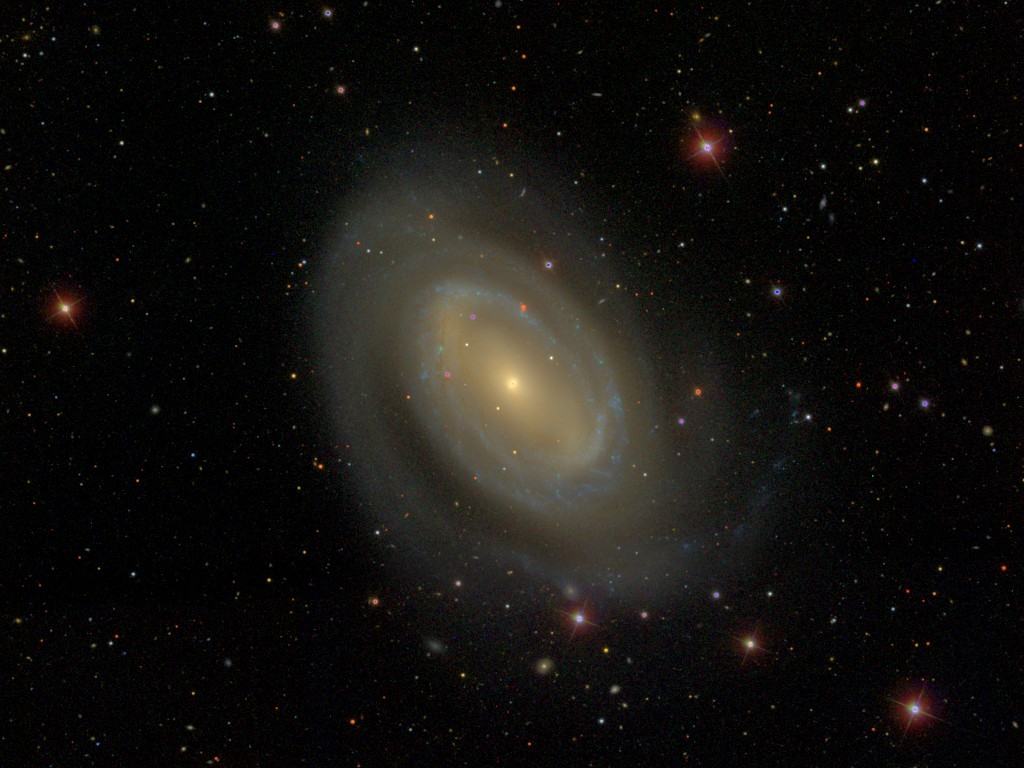

In [9]:
#SDSS
Image('n4725_SDSS.jpg', width=500)

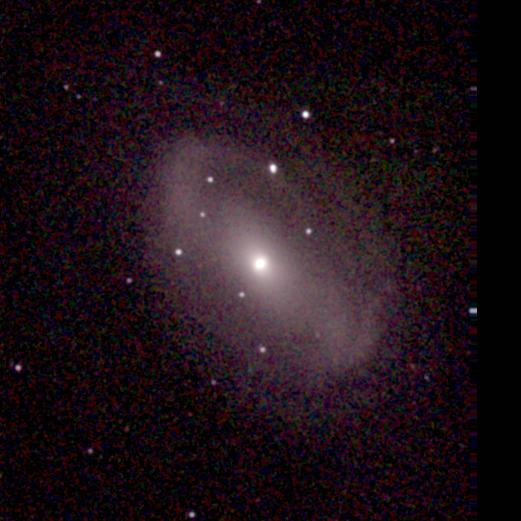

In [10]:
#JHK
Image('n4725_2MASS.jpg', width=300)

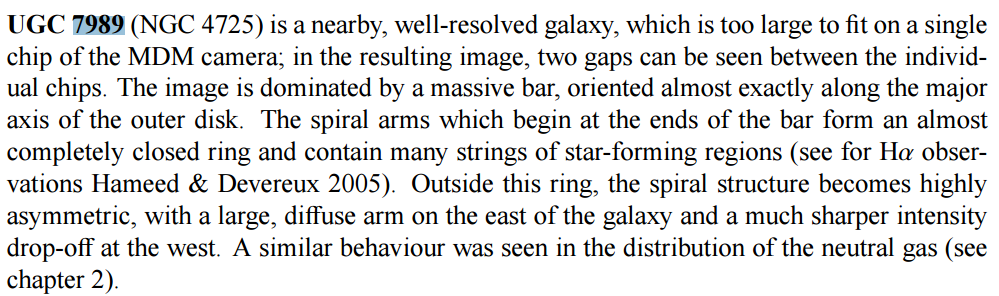

In [11]:
Image('noord_p113_cite.png')

## Кинематические данные по звездам

Дисперсии скоростей и кривая вращения - есть в Heraudeau 1999 http://adsabs.harvard.edu/cgi-bin/bib_query?1999A%26AS..136..509H до ~50'' (1 разрез), PA=$35^{\circ}$

#TODO: понять, исправлено ли за наклон

### Кривая вращения

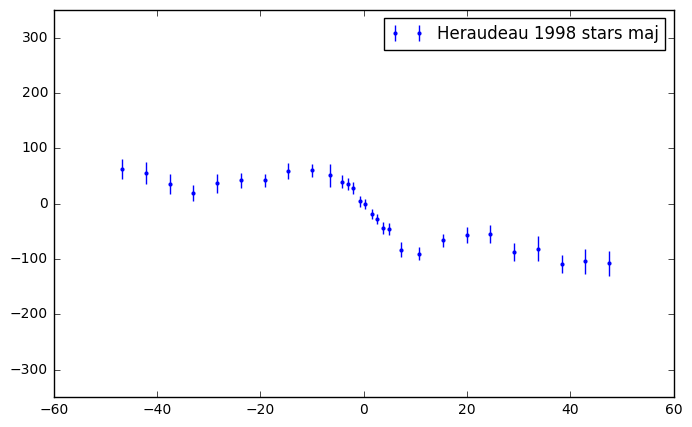

In [12]:
# Данные по звездной кинематике Heraudeau+1999 вдоль большой полуоси (не исправленные за наклон?) - из HYPERLEDA
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("her99_kinem.dat", float))

fig = plt.figure(figsize=[8,5])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='.', marker='.', mew=0, label="Heraudeau 1998 stars maj")
plt.legend()
plt.ylim(-350., 350.)
plt.show()

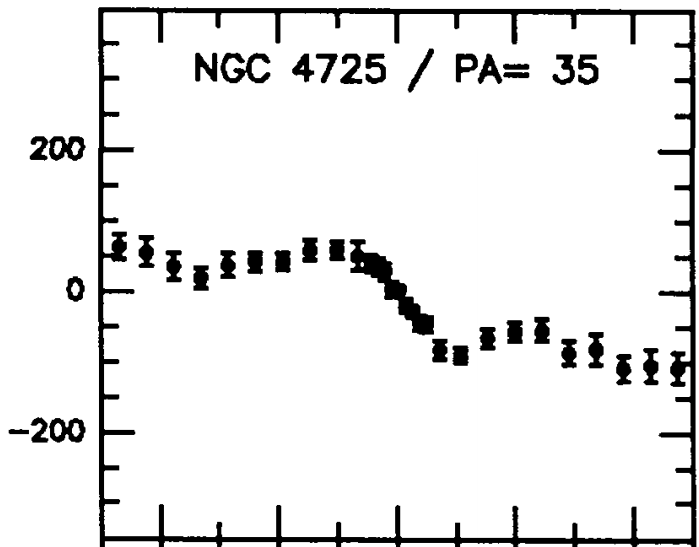

In [13]:
Image('her99_rot.png') #оригинал

Приближение:

In [14]:
r_ma_b, vel_ma_b, e_vel_b = zip(*sorted(zip(np.abs(r_ma), np.abs(vel_ma), e_vel_ma)))

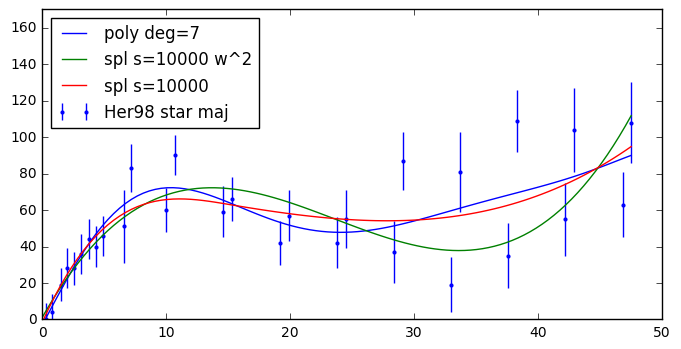

In [15]:
fig = plt.figure(figsize=[8,4])
plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Her98 star maj')

test_points = np.linspace(0.0, max(r_ma_b), 100)

poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=7))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=7')

def w(arr):
    return map(lambda l: 1/(1. + l**2), arr)

import scipy.interpolate as inter

spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=10000., w=w(e_vel_b))
plt.plot(test_points, spl(test_points), '-', label='spl s=10000 w^2')

spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=10000.)
plt.plot(test_points, spl(test_points), '-', label='spl s=10000')

plt.legend(loc='upper left')
plt.ylim(0, 170)
plt.show()

C весами плохо получается, полином и обычный почти совпадают - берем их:

In [16]:
star_approx = spl

### Дисперсии

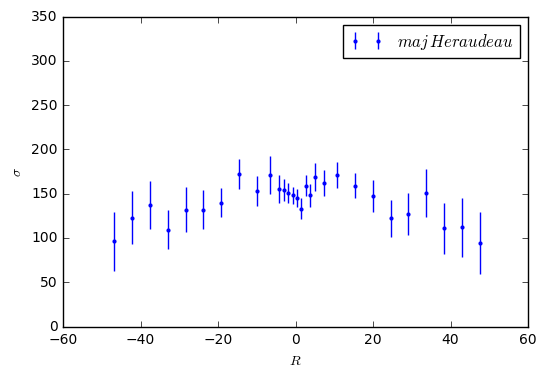

In [17]:
r_sig_ma = r_ma #Heraudeau+1999

fig = plt.figure(figsize=[6., 4.])
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label=r'$maj\, Heraudeau $')

plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.ylim(0, 350)
plt.legend()
plt.show()

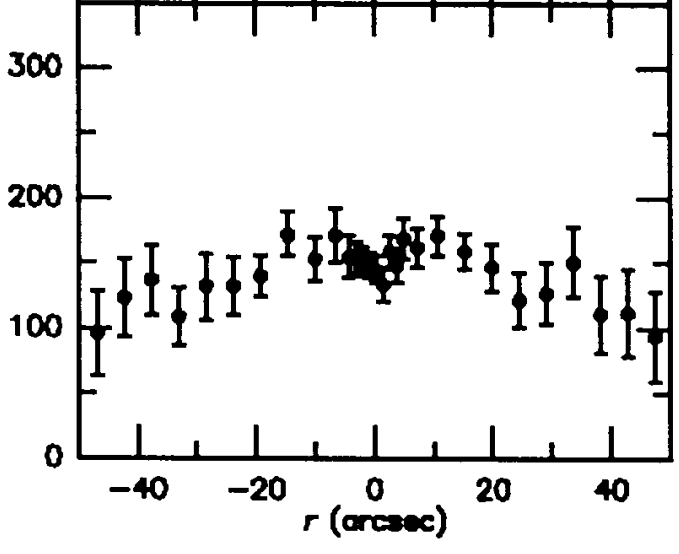

In [18]:
Image('her99_disp.png') #из статьи

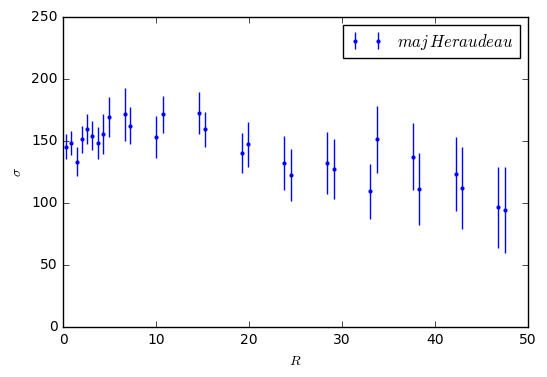

In [19]:
fig = plt.figure(figsize=[6., 4.])
plt.errorbar(map(abs, r_sig_ma), sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label=r'$maj\, Heraudeau $')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.ylim(0, 250)
plt.legend()
plt.show()

Для большой оси: $\sigma^2_{maj} = \sigma^2_{\varphi}\sin^2 i + \sigma^2_{z}\cos^2 i$, следовательно примерные ограничения
$$\sigma_{maj}  < \frac{\sigma_{maj}}{\sqrt{\sin^2 i + 0.49\cos^2 i}}< \sigma_R = \frac{\sigma_{maj}}{\sqrt{f\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sigma_{maj}}{\sqrt{0.5\sin^2 i + 0.09\cos^2 i}} < \frac{\sqrt{2}\sigma_{maj}}{\sin i} (или \frac{\sigma_{maj}}{\sqrt{f}\sin i}),$$ 
или можно более точную оценку дать, если построить $f$ (сейчас $0.5 < f < 1$).

Для малой оси: $\sigma^2_{min} = \sigma^2_{R}\sin^2 i + \sigma^2_{z}\cos^2 i$ и ограничения
$$\sigma_{min} < \frac{\sigma_{min}}{\sqrt{\sin^2 i + 0.49\cos^2 i}} < \sigma_R = \frac{\sigma_{min}}{\sqrt{\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sigma_{min}}{\sqrt{\sin^2 i + 0.09\cos^2 i}} < \frac{\sigma_{min}}{\sin i}$$ 

Соответственно имеем 5 оценок из maj и 4 оценки из min.

У нас только большая ось - все оценки из нее:

In [20]:
spl_maj = inter.UnivariateSpline(r_sig_ma, sig_ma, k=3, s=10000.)
sig_maj_lim = max(r_sig_ma)

points = np.linspace(0.1, max(r_ma)+15., 100)

In [21]:
# TODO: move to external file

def flat_end(argument):
    '''декоратор для того, чтобы продолжать функцию на уровне последнего значения'''
    def real_decorator(function):
        def wrapper(*args, **kwargs):
            if args[0] < argument:
                return function(*args, **kwargs)
            else:
                return function(argument, *args[1:], **kwargs)
        return wrapper
    return real_decorator

@flat_end(sig_maj_lim)
def sig_R_maj_minmin(r, spl_maj=spl_maj):
    return spl_maj(r).item()

@flat_end(sig_maj_lim)
def sig_R_maj_min(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_maj_lim)
def sig_R_maj_max(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(0.5*sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_maj_lim)
def sig_R_maj_maxmax(r, spl_maj=spl_maj):
    return spl_maj(r)*sqrt(2)/sin_i
    
@flat_end(sig_maj_lim)
def sig_R_maj_maxmaxtrue(r, spl_maj=spl_maj):
    return spl_maj(r)/sin_i/sqrt(sigPhi_to_sigR_real(r))

Используем соотношение $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987)

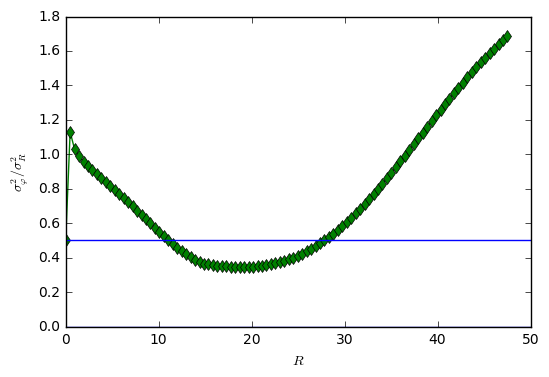

In [22]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*star_approx.derivative()(R) / star_approx(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='green')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0)
plt.show()

Т.к. насчет малой оси я не уверен - приближения делаем по большой.

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: invalid value encountered in sqrt


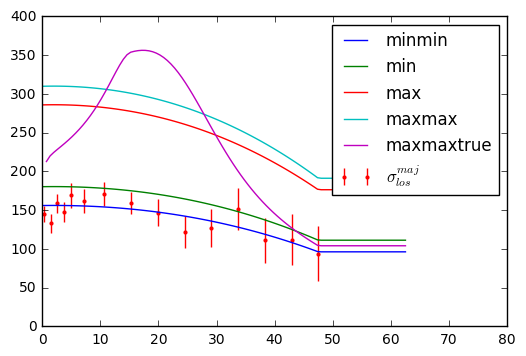

In [23]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'min')
plt.plot(points, map(sig_R_maj_max, points), label = 'max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,80)
plt.show()

Видно, что настоящее еще и больше.

## Данные по газу

### Кривая вращения

* есть у Ноордермеера в виде точек на карте (но не в тезисах, а в статье http://adsabs.harvard.edu/cgi-bin/bib_query?2005A%26A...442..137N) $\rm{HI}$
* есть тут http://www.aanda.org/articles/aa/pdf/2011/06/aa16177-10.pdf (тоже WHISP $\rm{HI}$)

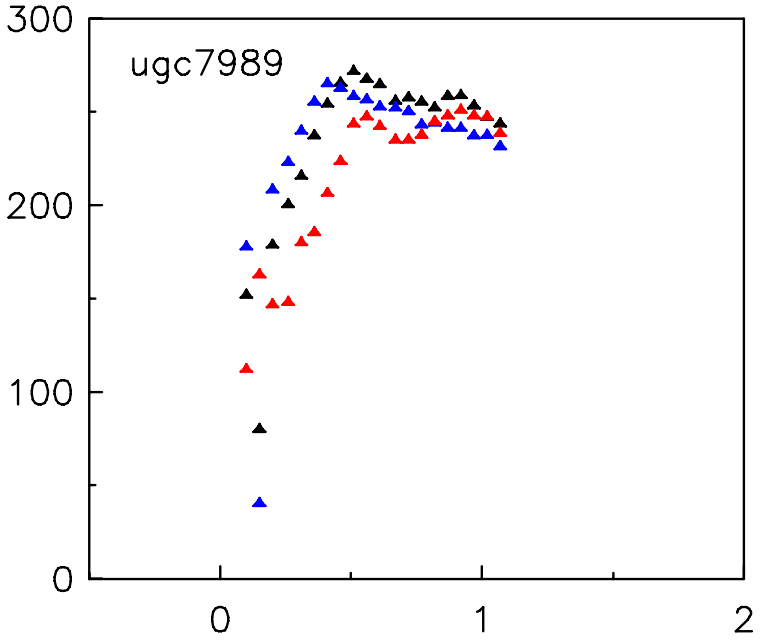

In [24]:
Image('HI_rot.png') #HI WHISP from van Eymeren 2011, PA=32.45, R25=25.91kpc, разные цвета - это две стороны, черная - усредненная

Достаточно странно расположились черные точки - не между двумя другими, выглядит неверным

(-0.5, 2.0)

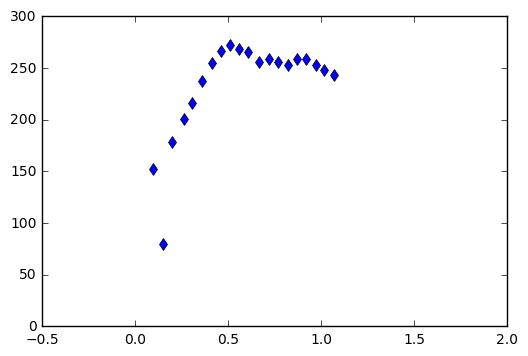

In [25]:
R25 = 25.91

# Данные по кинематике газа van Eymeren 2011 в HI
r_hi, vel_hi = zip(*np.loadtxt("HI_rot.dat", float, delimiter=','))
plt.plot(r_hi, vel_hi, 'd', label='HI Eymeren+2011')
plt.ylim(0, 300)
plt.xlim(-0.5, 2.)

Из Ноордермеера:

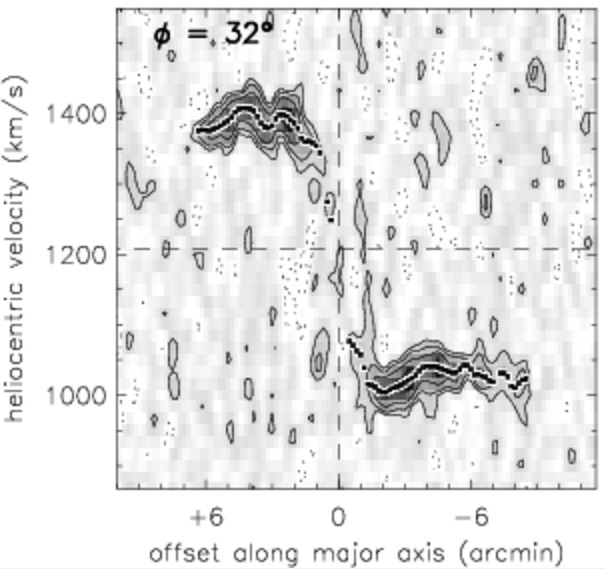

In [26]:
Image('noord_rot.png')

(-10.0, 11.0)

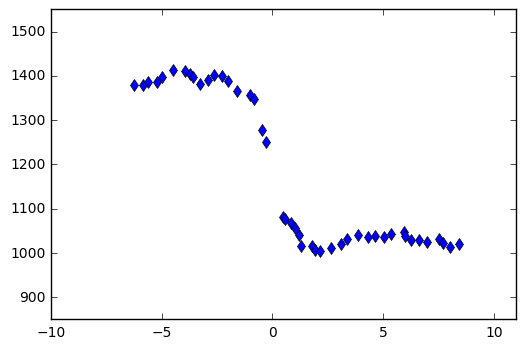

In [27]:
# Данные по кинематике газа van Eymeren 2011 в HI
r_n, vel_n = zip(*np.loadtxt("noord_rot.dat", float, delimiter=','))
plt.plot(r_n, vel_n, 'd', label='HI Noord+2005')
plt.ylim(850, 1550)
plt.xlim(-10., 11.)

In [28]:
vel_n = map(lambda l: l-1208., vel_n)
r_n, vel_n = zip(*sorted(zip(np.abs(r_n), np.abs(vel_n))))
r_n = [l*60 for l in r_n]

Посмотрим на согласие между измерениями:

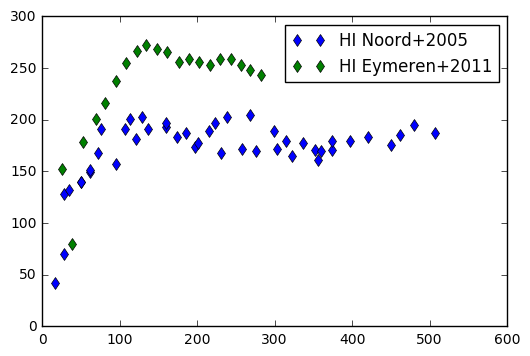

In [29]:
plt.plot(r_n, vel_n, 'd', label='HI Noord+2005')
plt.plot([l*R25/scale for l in r_hi], vel_hi, 'd', label='HI Eymeren+2011')
plt.legend()
plt.show()

Похоже, что у Ноордермеера не нормировано на угол. Проверим:

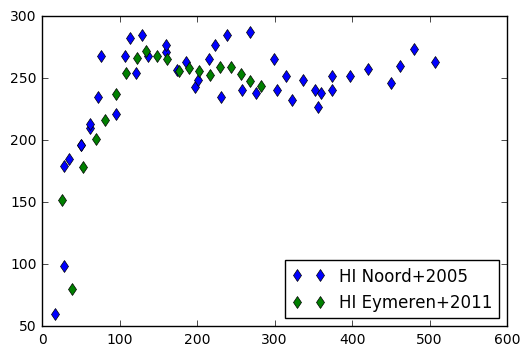

In [30]:
plt.plot(r_n, [l/sin_i for l in vel_n], 'd', label='HI Noord+2005')
plt.plot([l*R25/scale for l in r_hi], vel_hi, 'd', label='HI Eymeren+2011')
plt.legend(loc='lower right')
plt.show()

Да, так и есть - данные хорошо совпали для исправленных за угол измерений Ноордермеера (даже для такой низкой точности снятия данных с рисунка). Странно, что у более новых данных протяженность значительно меньше. Для построения кривой возьмем более оба набора до $200^{''}$: 

In [31]:
r_hi = [l*R25/scale for l in r_hi]
vel_n = [l/sin_i for l in vel_n]

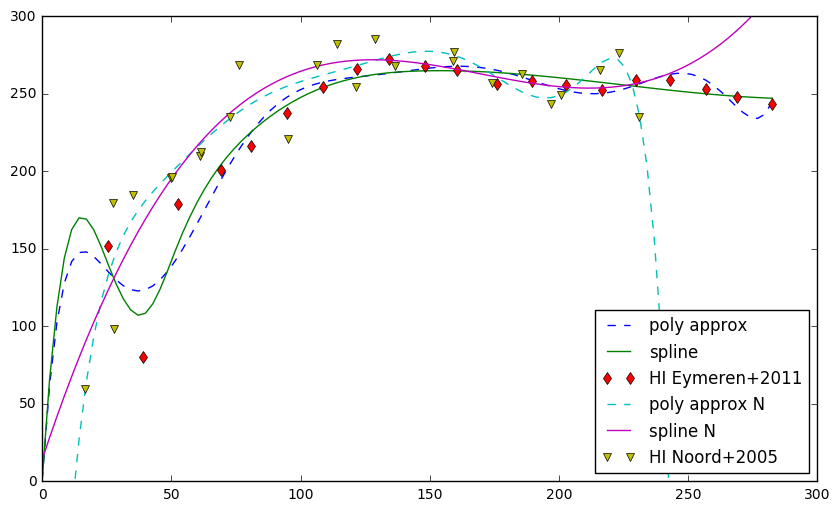

In [32]:
fig = plt.figure(figsize=[10,6])
_1,_2, = [0.0,],[0.0,]
_1.extend(r_hi)
_2.extend(vel_hi)
_1,_2 = zip(*sorted(zip(_1,_2)))

gas_approx = poly1d(polyfit(_1, _2, deg=9))
test_points = np.linspace(0, max(r_hi), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(_1, _2, k=3, s=2000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.plot(r_hi, vel_hi, 'd', label='HI Eymeren+2011')

gas_approx = poly1d(polyfit(r_n[:-20], vel_n[:-20], deg=9))
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx N')

spl_gas = inter.UnivariateSpline(r_n[:-20], vel_n[:-20], k=3, s=10000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline N')

plt.plot(r_n[:-20], vel_n[:-20], 'v', label='HI Noord+2005')


plt.ylim(0, 300)
plt.legend(loc='lower right')
plt.show()

Похоже для данных Eymeren вторая точка все портит и вообще точность в нужной нам области хромает.

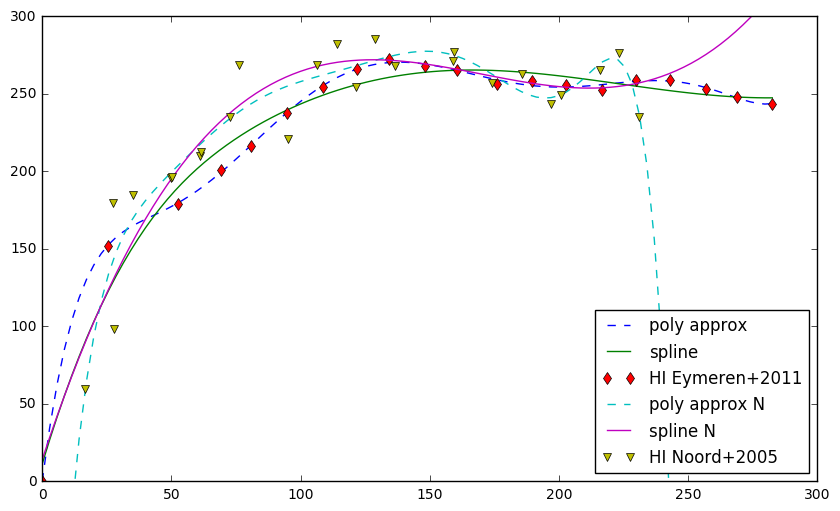

In [33]:
fig = plt.figure(figsize=[10,6])
_1,_2, = [0.0,],[0.0,]
_1.extend(r_hi[1:])
_2.extend(vel_hi[1:])
_1,_2 = zip(*sorted(zip(_1,_2)))

gas_approx = poly1d(polyfit(_1, _2, deg=9))
test_points = np.linspace(0, max(r_hi), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(_1, _2, k=3, s=2000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.plot(_1, _2, 'd', label='HI Eymeren+2011')

gas_approx = poly1d(polyfit(r_n[:-20], vel_n[:-20], deg=9))
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx N')

spl_gas_N = inter.UnivariateSpline(r_n[:-20], vel_n[:-20], k=3, s=10000.)
plt.plot(test_points, spl_gas_N(test_points), '-', label='spline N')

plt.plot(r_n[:-20], vel_n[:-20], 'v', label='HI Noord+2005')


plt.ylim(0, 300)
plt.legend(loc='lower right')
plt.show()

Если убрать эту точку - то сплайны почти совпадают, но все равно точность недостаточная.

TODO: поискать более точные данные - например CO

### Эпициклическая частота

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

utils.ipynb:4: RuntimeWarning: divide by zero encountered in double_scalars
utils.ipynb:4: RuntimeWarning: invalid value encountered in sqrt
utils.ipynb:6: RuntimeWarning: divide by zero encountered in double_scalars


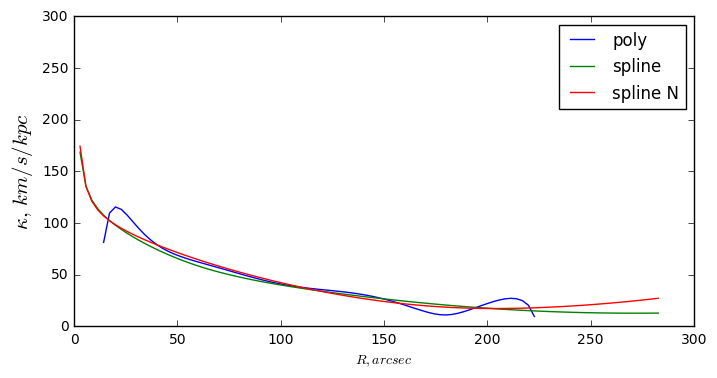

In [34]:
fig = plt.figure(figsize=[8, 4])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-', label='poly')
plt.plot(test_points, [epicyclicFreq_real(spl_gas, x, scale) for x in test_points], '-', label='spline')
plt.plot(test_points, [epicyclicFreq_real(spl_gas_N, x, scale) for x in test_points], '-', label='spline N')
plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 300)
plt.legend()
plt.show()

Достаточно сложно, учитывая что нас интересуют первые 50 секунд. Будем считать, что нас интересуют сплайны.

### Поверхностная плотность газа 

* $\Sigma_{HI}$ и $\Sigma_{H_2}$ https://arxiv.org/pdf/1608.06735v1.pdf Yim, Hulst 2016
* $\Sigma_{HI}$ из Ноордермеера

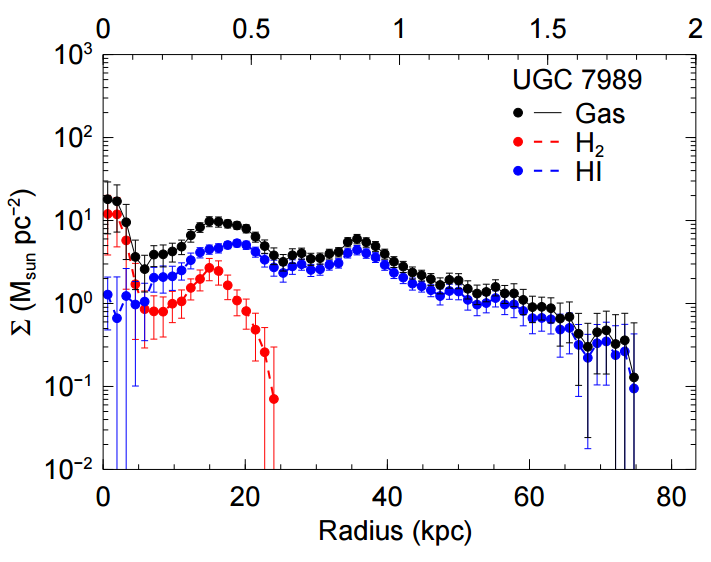

In [35]:
Image('u7989_gas_dens.png')

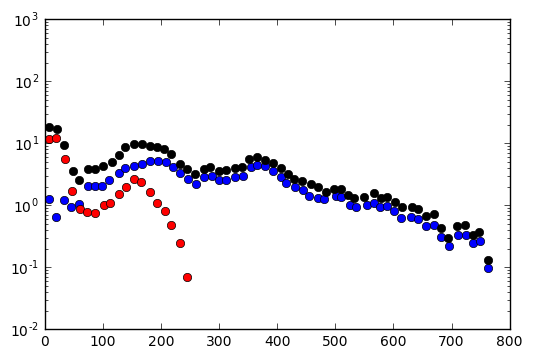

In [36]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_dens.dat", float, delimiter=','))

plt.semilogy([l/scale for l in r_g_dens[:58]], gas_dens[:58], 'o', color='blue')
plt.semilogy([l/scale for l in r_g_dens[58:77]], gas_dens[58:77], 'o', color='red')
plt.semilogy([l/scale for l in r_g_dens[77:]], gas_dens[77:], 'o', color='black')
plt.ylim(0.01, 1000)
plt.show()

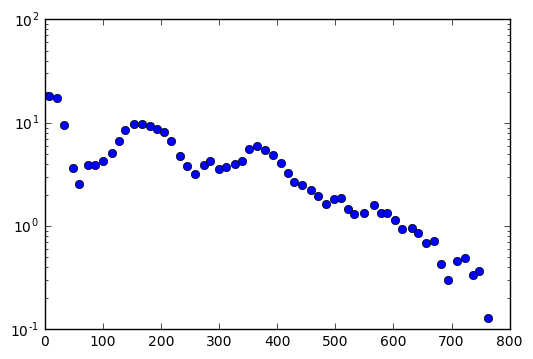

In [37]:
plt.semilogy([l/scale for l in r_g_dens[77:]], gas_dens[77:], 'o') #только сумма
plt.show()

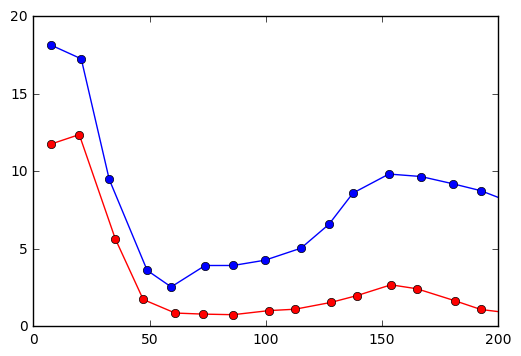

In [38]:
plt.plot([l/scale for l in r_g_dens[58:77]], gas_dens[58:77], '-o', color='r')
plt.plot([l/scale for l in r_g_dens[77:]], gas_dens[77:], '-o') #только сумма
plt.xlim(0, 200)
plt.show()

Ноордермеер:

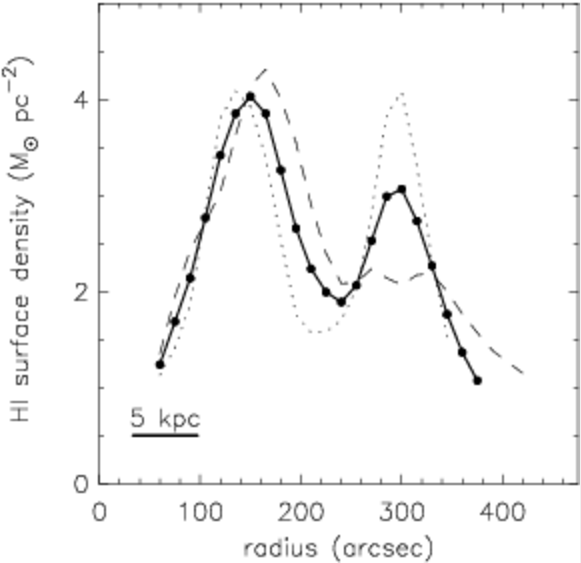

In [39]:
Image('noord_gdens.png')

In [40]:
r_g_n, gas_dens_n = zip(*np.loadtxt("HI_dens.dat", float, delimiter=','))

(0, 5)

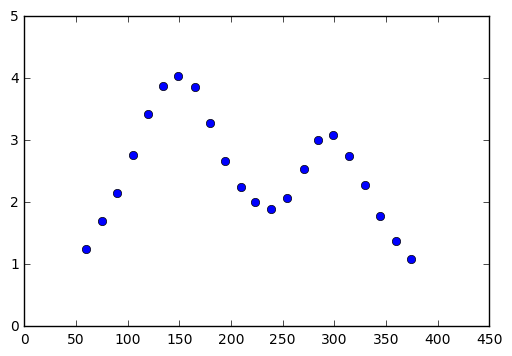

In [41]:
plt.plot(r_g_n, gas_dens_n, 'o')
plt.xlim(0, 450)
plt.ylim(0, 5)

Сравнение:

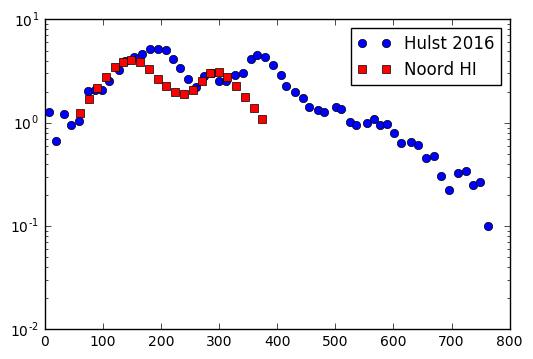

In [42]:
plt.semilogy([l/scale for l in r_g_dens[:58]], gas_dens[:58], 'o', color='blue', label='Hulst 2016')
plt.semilogy(r_g_n, gas_dens_n, 's', label='Noord HI', color='red')
plt.legend()

Как и было изначально видно - пики заметно смещены. 

Разгадка кроется, кмк, в том что в работе 2016 года расстояние взято равным 26.8 Мпк, а в NED это соответствует (Virgo + GA + Shapley) и масштаб 0.130 kpc/arcseс.

Также это подтерждается сравнением с верхней шкалой на рисунке, где $R/R_{25}$, $R_{25}=321.^{"}$ и примерно по соотношенияю можно оценить

$$20.5\,kpc/(0.5*321)\,arcsec = 0.1308\, kpc/arcsec$$

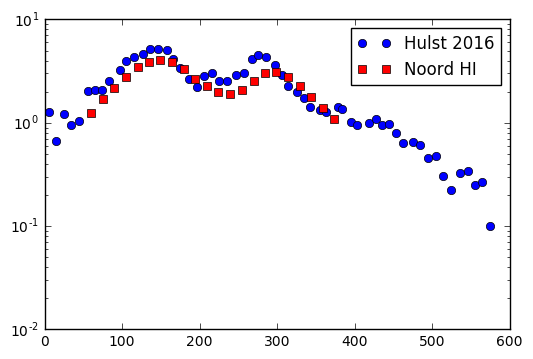

In [43]:
plt.semilogy([l/0.130 for l in r_g_dens[:58]], gas_dens[:58], 'o', color='blue', label='Hulst 2016')
plt.semilogy(r_g_n, gas_dens_n, 's', label='Noord HI', color='red')
plt.legend()
plt.show()

И теперь с учетом спирали они стали похожи друг на друга.

Используем более современный газ $\rm{HI}$ + $\rm{HII}$:

In [44]:
r_mol_dens, mol_dens = [l/0.130 for l in r_g_dens[58:77]], gas_dens[58:77]
r_g_dens, gas_dens = [l/0.130 for l in r_g_dens[77:]], gas_dens[77:] #используем только полный газ

## Данные по фотометрии

* декомпозиция в $J$, $H$, $K$ из http://www.aanda.org/articles/aa/pdf/2001/10/aa10227.pdf (без профилей)
* древняя в $r$ http://adsabs.harvard.edu/cgi-bin/bib_query?1985ApJS...59..115K
* S4G http://adsabs.harvard.edu/abs/2015ApJS..219....4S (в онлайн данных)

In [45]:
all_photometry = []

**S4G** данные из GALFIT (есть бар в модели!):

In [46]:
r_eff_s4g = 10.14
# mu_eff_s4g = ...
n_s4g = 2.212
mu0d_s4g = 20.337
h_disc_s4g = 73.20

M_to_L_s4g = 0.6

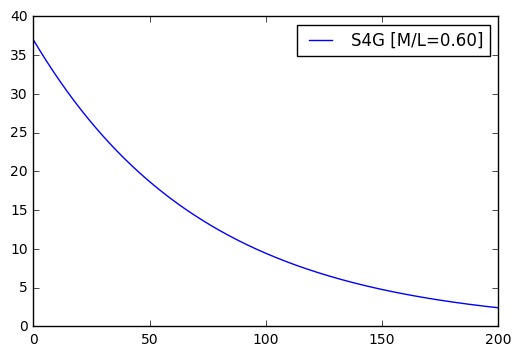

In [47]:
p_ = np.arange(0.1, 200., 0.1)

surf_s4g = [surf_density(mu=mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), M_to_L=M_to_L_s4g, band='3.6') for l in p_]
plt.plot(p_, surf_s4g, '-', label='S4G [M/L={:2.2f}]'.format(M_to_L_s4g))
plt.legend()
plt.show()

Ну не знаю, очень уж маленькие значения получаются, странно это все.

In [48]:
all_photometry.append(('S4G 3.6', r_eff_s4g, None, n_s4g, mu0d_s4g, h_disc_s4g, M_to_L_s4g, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), M_to_L=M_to_L_s4g, band='3.6')))

In [49]:
mu0d_J = 17.78
h_disc_J = 49.99
mu0d_H = 17.11
h_disc_H = 50.28
mu0d_K = 17.01
h_disc_K = 54.66

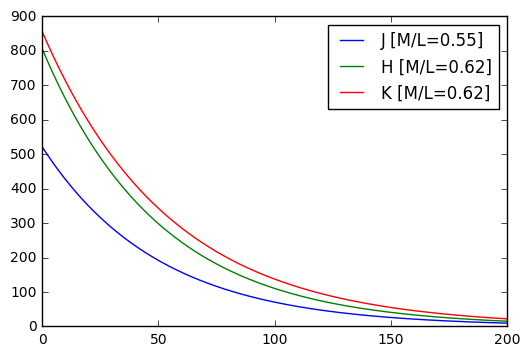

In [50]:
b_v_color = 0.012 #TODO: не знаем на самом деле какой цвет (вот тут https://arxiv.org/pdf/1102.1724v1.pdf указано 0.012)
# тут https://arxiv.org/pdf/astro-ph/0610688v2.pdf есть B и V в Янских

M_to_L_J = bell_mass_to_light(b_v_color, 'J', 'B-V')
surf_J = [surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))

M_to_L_H = bell_mass_to_light(b_v_color, 'H', 'B-V')
surf_H = [surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=M_to_L_H, band='H') for l in p_]
plt.plot(p_, surf_H, '-', label='H [M/L={:2.2f}]'.format(M_to_L_H))

M_to_L_K = bell_mass_to_light(b_v_color, 'K', 'B-V')
surf_K = [surf_density(mu=mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L=M_to_L_K, band='K') for l in p_]
plt.plot(p_, surf_K, '-', label='K [M/L={:2.2f}]'.format(M_to_L_K))

plt.legend()

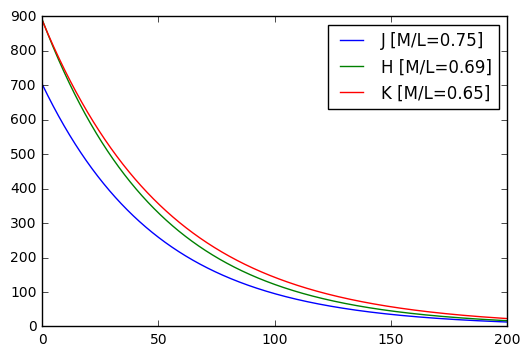

In [51]:
p_ = np.arange(0.1, 200., 0.1)

b_r_color = 0.55 #вот отсюда древнее B-R https://ui.adsabs.harvard.edu/#abs/1995AJ....109..543B/abstract

M_to_L_J = bell_mass_to_light(b_r_color, 'J', 'B-R')
surf_J = [surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))

M_to_L_H = bell_mass_to_light(b_r_color, 'H', 'B-R')
surf_H = [surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=M_to_L_H, band='H') for l in p_]
plt.plot(p_, surf_H, '-', label='H [M/L={:2.2f}]'.format(M_to_L_H))

M_to_L_K = bell_mass_to_light(b_r_color, 'K', 'B-R')
surf_K = [surf_density(mu=mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L=M_to_L_K, band='K') for l in p_]
plt.plot(p_, surf_K, '-', label='K [M/L={:2.2f}]'.format(M_to_L_K))

plt.legend()

Разница, как мы видим, не столь существенная.

TODO: разобраться с цветом

In [52]:
all_photometry.append(('Heidt J', None, None, None, mu0d_J, h_disc_J, M_to_L_J, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J')))

all_photometry.append(('Heidt H', None, None, None, mu0d_H, h_disc_H, M_to_L_H, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=M_to_L_H, band='H')))

all_photometry.append(('Heidt K', None, None, None, mu0d_K, h_disc_K, M_to_L_K, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L=M_to_L_K, band='K')))

In [53]:
from tabulate import tabulate
import pandas as pd

# TODO: сделать покрасивее

df = pd.DataFrame(data=all_photometry, columns=['Name', 'r_eff', 'mu_eff', 'n', 'mu0_d', 'h_disc', 'M/L', 'surf'])
df['M/L'] = df['M/L'].apply(lambda l: '%2.2f'%l)
print tabulate(df, headers='keys', tablefmt='psql')

+----+---------+---------+----------+---------+---------+----------+-------+-------------------------------------------+
|    | Name    |   r_eff | mu_eff   |       n |   mu0_d |   h_disc |   M/L | surf                                      |
|----+---------+---------+----------+---------+---------+----------+-------+-------------------------------------------|
|  0 | S4G 3.6 |   10.14 |          |   2.212 |  20.337 |    73.2  |  0.6  | <function <lambda> at 0x000000000C5F5C18> |
|  1 | Heidt J |  nan    |          | nan     |  17.78  |    49.99 |  0.75 | <function <lambda> at 0x000000000ACC8EB8> |
|  2 | Heidt H |  nan    |          | nan     |  17.11  |    50.28 |  0.69 | <function <lambda> at 0x000000000C325DD8> |
|  3 | Heidt K |  nan    |          | nan     |  17.01  |    54.66 |  0.65 | <function <lambda> at 0x000000000C325518> |
+----+---------+---------+----------+---------+---------+----------+-------+-------------------------------------------+


## Зоны звездообразования


$H_{\alpha}$ , $UV$

есть $H_{\alpha}$ в Hameed 2005 http://iopscience.iop.org/article/10.1086/430211/pdf

**ВАЖНО:** в этой работе расстояние вообще 12.4 Мпк, соответственно неправильно пересчитываются масштабы

TODO: разобраться с расстояниями-масштабами, проверить в других галактиках

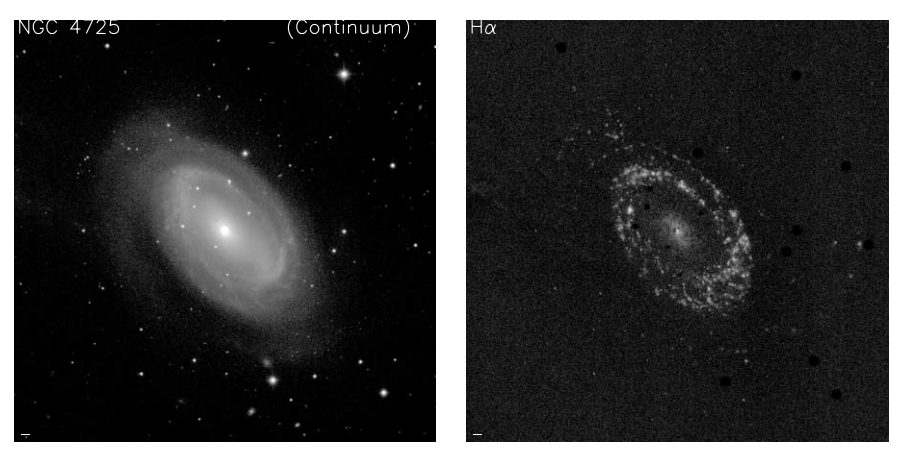

In [54]:
Image('n4725_halpha.png')

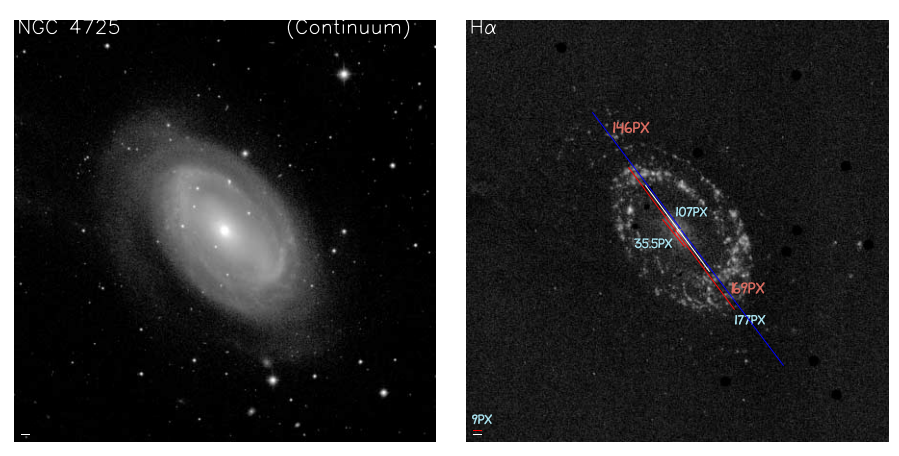

In [55]:
Image('n4725_halpha_dist.png')

Совмещенная картинка $H_{\alpha}$ + SDSS:

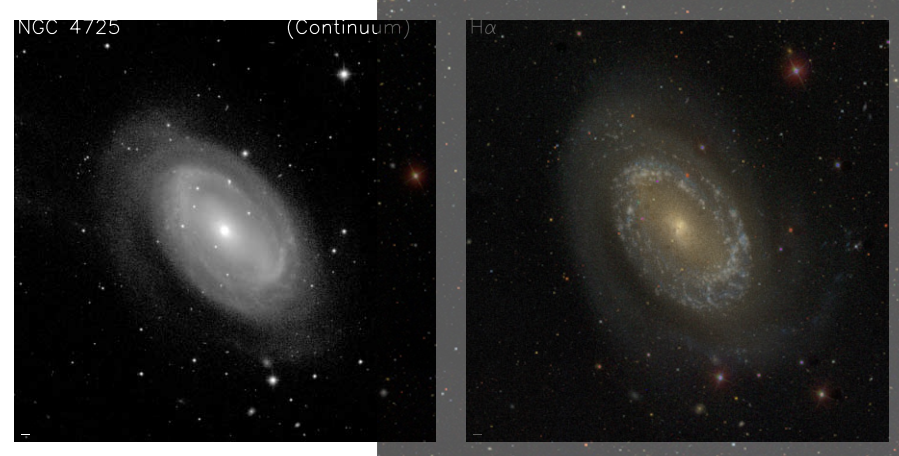

In [56]:
Image('n4725_halpha_plus_sdss.png')

(0, 200)

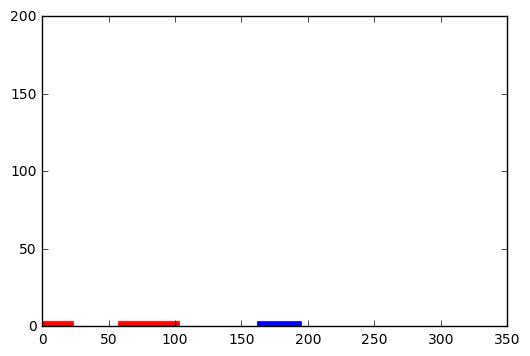

In [57]:
def plot_SF(ax):
    ax.plot([0., 35.5/2./9./scale], [0., 0.], '-', lw=7., color='red')
    ax.plot([107./2./9./scale, 177./2./9./scale], [0., 0.], '-', lw=7., color='red')
    ax.plot([146./9./scale, 169./9./scale], [0., 0.], '-', lw=7., color='b') #внешняя спираль
    
plot_SF(plt.gca())
plt.xlim(0, 350)
plt.ylim(0, 200)

Видно, что внешняя спираль находится на первом горбе данных.

## Неустойчивость

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [58]:
sound_vel = 6  #скорость звука в газе, км/с
data_lim = max(r_sig_ma) #где заканчиваются данные

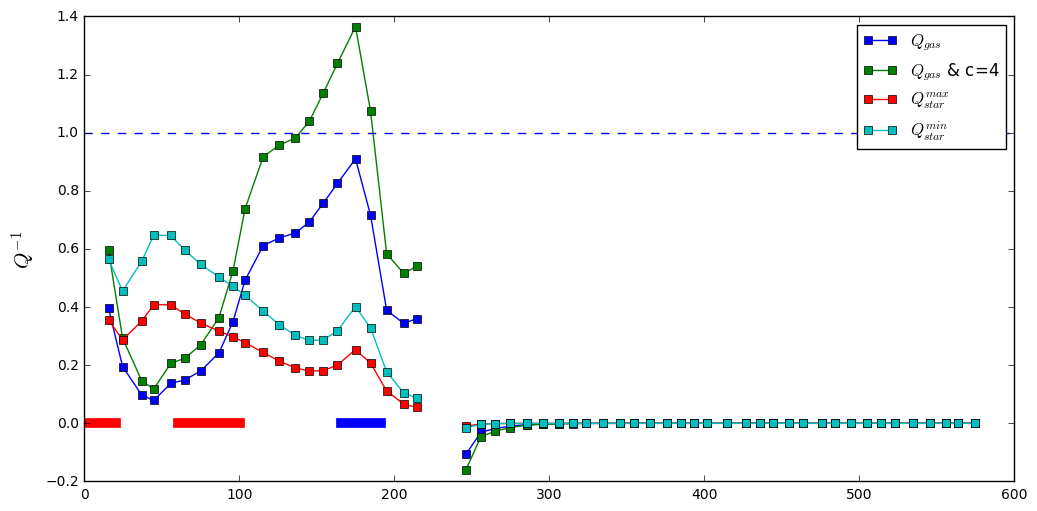

In [59]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & c=4')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_max, r_g_dens), 
                        [surf_density(l_, M_to_L_K, 'K') for l_ in [mu_disc(ll, mu0=mu0d_K, h=h_disc_K) for ll in r_g_dens]])], 's-', label='$Q_{star}^{max}$')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_min, r_g_dens), 
                        [surf_density(l_, M_to_L_K, 'K') for l_ in [mu_disc(ll, mu0=mu0d_K, h=h_disc_K) for ll in r_g_dens]])], 's-', label='$Q_{star}^{min}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.show()

Видно, что в центре с кучей газа неустойчивость, но эффект быстро спадает.

**НЕ ИСПРАВЛЕНО ЗА 1.6!** Т.к. тут еще сравнение с звездным Q.

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

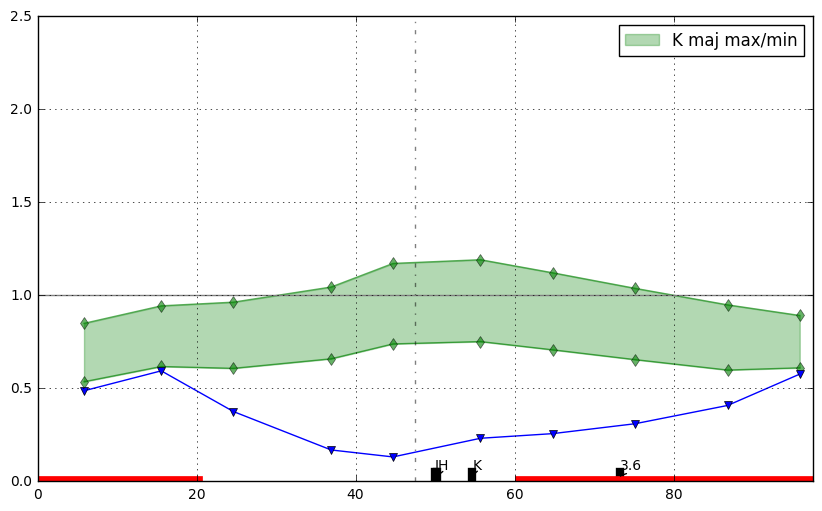

In [60]:
total_gas_data = zip(r_g_dens, map(lambda l: l, gas_dens))[:10]
disk_scales = [(l[5], l[0].split(' ')[1]) for l in all_photometry]

fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='K maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.show()

## Картинка 

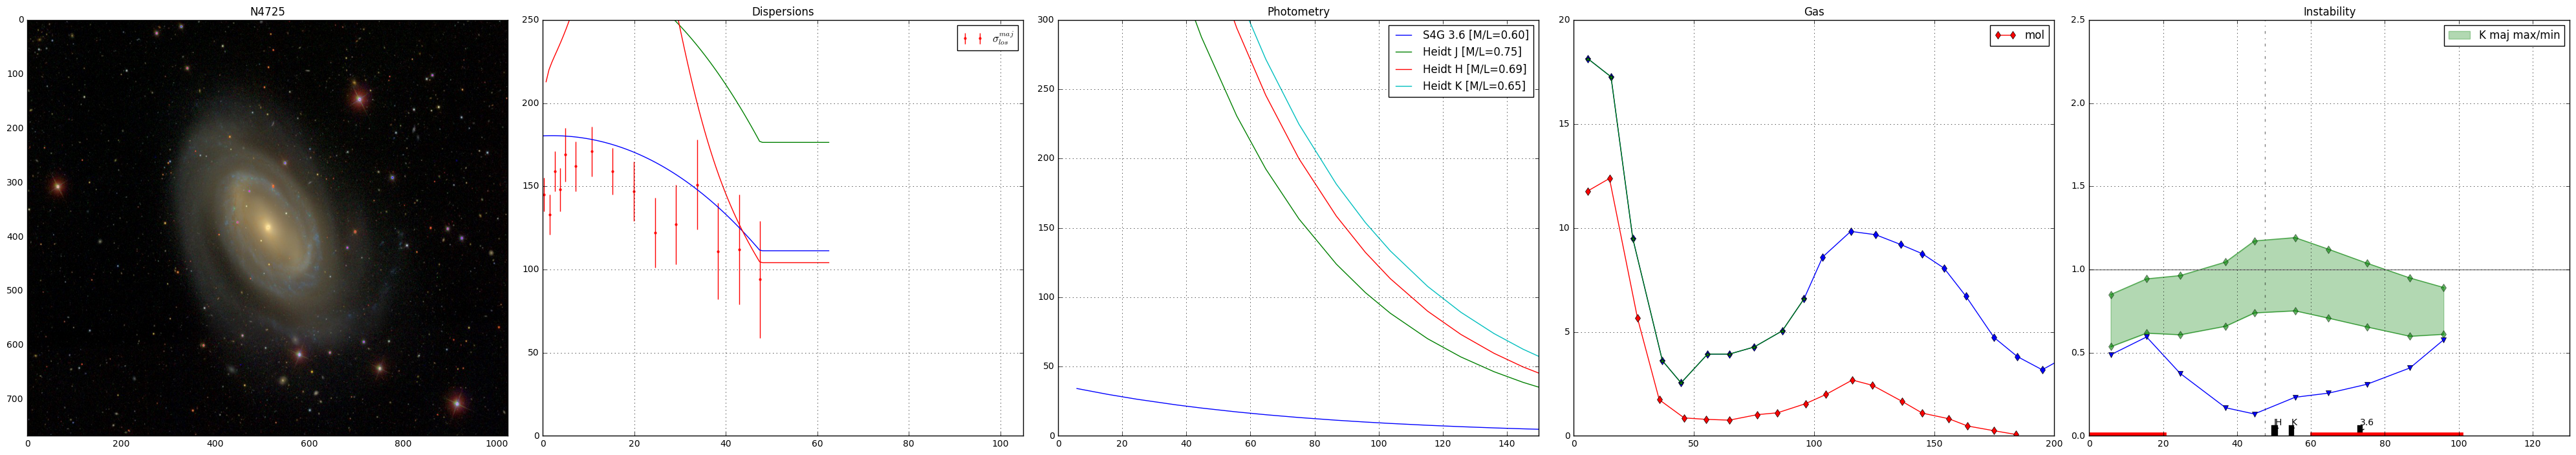

In [61]:
summary_imgs_path = '..\\..\pics\\notebook_summary\\'

def save_model_plot(path):
    fig, axes = plt.subplots(1, 5, figsize=[40,7])
    fig.tight_layout()
    
    axes[0].imshow(ImagePIL.open('n4725_SDSS.jpg'), aspect='auto')
    axes[0].set_title(name)
    
    try:
        axes[1].errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
        axes[1].plot(points, map(sig_R_maj_min, points))
        axes[1].plot(points, map(sig_R_maj_max, points))
        axes[1].plot(points, map(sig_R_maj_maxmaxtrue, points))
    except Exception:
        pass
    
    try:
        axes[1].errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')
        axes[1].plot(points, map(sig_R_minor_min, points), '--')
        axes[1].plot(points, map(sig_R_minor_max, points), '--')
    except Exception:
        pass

    axes[1].set_ylim(0,250)
    axes[1].set_xlim(0, 105)  
    axes[1].grid()
    axes[1].legend()
    axes[1].set_title('Dispersions')
    
    for photom in all_photometry:
        axes[2].plot(r_g_dens, map(photom[-1], r_g_dens), '-', label='{} [M/L={:2.2f}]'.format(photom[0], photom[-2]))
    axes[2].set_xlim(0, 150)
    axes[2].set_ylim(0, 300)
    axes[2].set_title('Photometry')
    axes[2].grid()
    axes[2].legend()
    
    axes[3].plot(r_g_dens, gas_dens, 'd-')
    axes[3].plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], '*-')
    axes[3].plot(r_mol_dens, mol_dens, 'd-', label='mol')
    axes[3].set_title('Gas')
    axes[3].grid()
    axes[3].set_xlim(0, 200)
    axes[3].legend()
    
    #change this
    plot_2f_vs_1f(ax=axes[4], total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='K maj max/min')

    axes[4].set_ylim(0., 2.5)
    axes[4].set_xlim(0., 130.)
    axes[4].axhline(y=1., ls='-', color='grey')
    plot_SF(axes[4])
    axes[4].grid()
    axes[4].set_title('Instability')
       
    plt.savefig(path+name+'.png', format='png', bbox_inches='tight')
    plt.show()
    
save_model_plot(summary_imgs_path)

# End

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


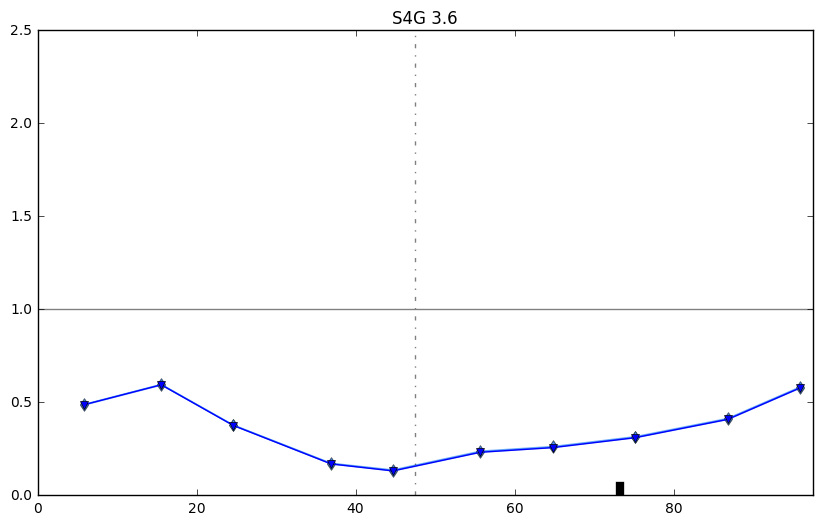

In [62]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=all_photometry[i][-1], 
              star_density_min=all_photometry[i][-1],
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [63]:
anim.save('..\\..\pics\\'+name+'.gif', writer='imagemagick', fps=1)

In [64]:
from IPython.display import HTML
HTML(anim.to_html5_video())

## Учет толщины

$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{s}})}{k\, h_{z}^{\mathrm{s}}}\right\} +\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{g}})}{k\, h_{z}^{\mathrm{g}}}\right\} >1$$

$$\begin{array}{rcl}
\sigma_{z}^{2}=\pi Gz_{0}^{\mathrm{s}}(\Sigma_{\mathrm{s}}+\Sigma_{\mathrm{g}})\,,\\
\\
c_{\mathrm{g}}^{2}=\pi Gz_{0}^{\mathrm{g}}(\Sigma_{\mathrm{g}}+\Sigma_{\mathrm{s}})\,.
\end{array}$$

Отсюда можно найти толщины

## Эксперименты

In [60]:
gas_data = zip(r_g_dens, gas_dens)[:10]
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_maxmax,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K')))

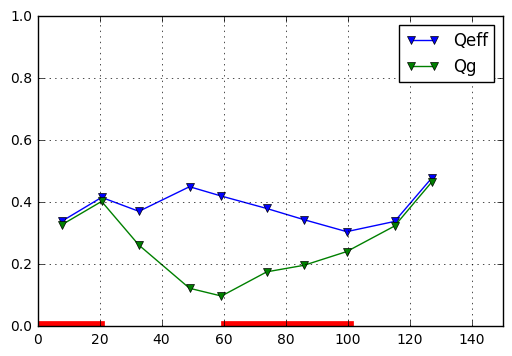

In [61]:
plt.plot(r_g_dens[:10], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:10], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

In [62]:
gas_data = zip(r_g_dens, gas_dens)[:10]
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_maxmaxtrue,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K')))

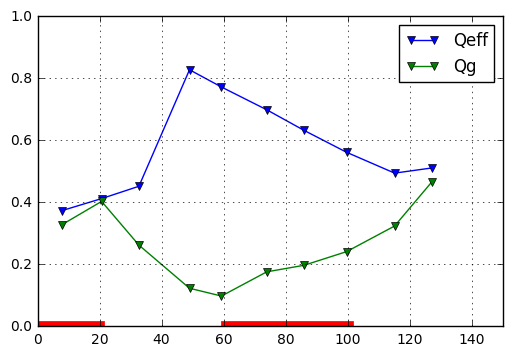

In [63]:
plt.plot(r_g_dens[:10], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:10], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

Другая оценка $\sigma_R$: 

In [64]:
gas_data = zip(r_g_dens, gas_dens)[:10]
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_minmin,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K')))

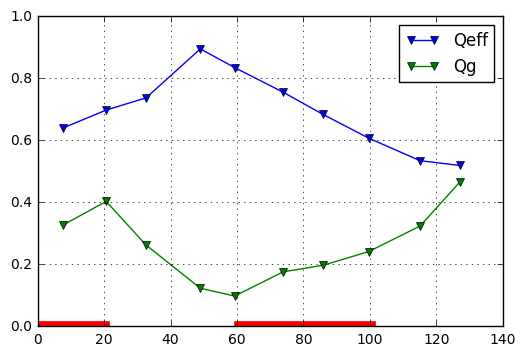

In [65]:
plt.plot(r_g_dens[:10], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:10], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
# plt.xlim(0., 8./0.072)
plt.legend()
plt.grid()
plot_SF(plt.gca())
plt.show()

Достаточно интересно - есть тенденция на начало неустойчивости (даже без 1.6) как раз в области звездообразования - но у нас дальше нет данных.

In [66]:
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
import plotly.plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

acc_dot = go.Scatter(
    x = r_g_dens[:7], 
    y = invQeff,
    mode='lines+markers',
    name = 'Qeff',
    marker=dict(
        size='16',
        color = ['#770000']*len(invQeff))
)
qgdat = go.Scatter(
    x = r_g_dens[:5], 
    y = invQg,
    mode='lines+markers',
    name = 'Qg',
    marker=dict(
        size='16',
        color = ['#007700']*len(invQeff))
)
data = [acc_dot, qgdat]

iplot(data, filename='scatter-plot-with-colorscale')

Из https://ui.adsabs.harvard.edu/#abs/2016MNRAS.460.1106W/abstract:
два возможных вида связи между молекулярным и атомарным газом $R_{mol} = \Sigma_{H_2}/\Sigma_{HI}$:

$$R_{mol} = \Sigma_{star}/81$$ или 
$$R_{mol} = \left(\frac{P_h}{1.7 \times 10^4 cm^{-3}K k_B } \right)^{0.8},\, P_h = \frac{\pi}{2}G\Sigma_g(\Sigma_g + \frac{\sigma_g}{\sigma_z}\Sigma_{star})$$

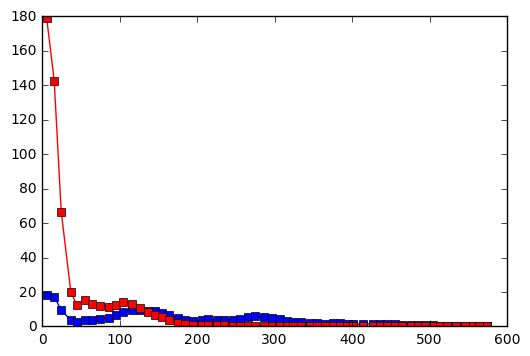

In [65]:
def R1(Sigma_star):
    return Sigma_star/81.

def h2_gas(r, h_gas_dens):
    return R1(star_density(r))*h_gas_dens

star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K')

plt.plot(r_g_dens, gas_dens, 's-', color='b')
plt.plot(r_g_dens, [h2_gas(_[0], _[1]) for _ in  zip(r_g_dens, gas_dens)], 's-', color='r')
plt.show()

Вторая оценка - малой оси у нас нет и придется вытаскивать из большой:

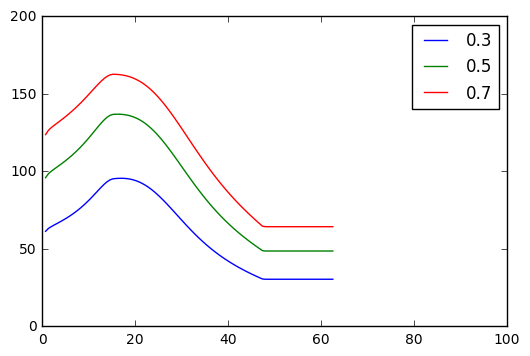

In [66]:
@flat_end(sig_maj_lim)
def sig_R_maj_true(r, alpha, spl_maj=spl_maj):
    return spl_maj(r)/sqrt(sigPhi_to_sigR_real(r)*sin_i**2 + alpha**2 * cos_i**2)

@flat_end(sig_maj_lim)
def sig_z(r, alpha, spl_maj=spl_maj):
    return sig_R_maj_true(r, alpha, spl_maj=spl_maj)*alpha

plt.plot(points, map(lambda l: sig_z(l, 0.3), points), label = '0.3')
plt.plot(points, map(lambda l: sig_z(l, 0.5), points), label = '0.5')
plt.plot(points, map(lambda l: sig_z(l, 0.7), points), label = '0.7')

plt.legend()
plt.ylim(0,200)
plt.xlim(0,100)
plt.show()

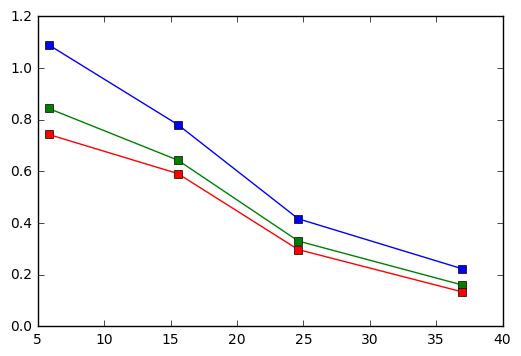

In [67]:
def R2(r, h_gas_dens, alpha, sound_vel):
    G = 6.67408
    kB = 3.7529917
    Ph = np.pi/2. * G * h_gas_dens * (h_gas_dens + sound_vel/sig_z(r, alpha) * star_density(r))
    return np.power(4.363474*Ph/(1.7 * 10000. * kB) , 0.8)

def h2_gas2(r, h_gas_dens, alpha, sound_vel):
    return R2(r, h_gas_dens, alpha, sound_vel)*h_gas_dens

plt.plot(r_g_dens[:4], [R2(_[0], _[1], 0.3, 6.) for _ in  zip(r_g_dens, gas_dens)[:4]], 's-')
plt.plot(r_g_dens[:4], [R2(_[0], _[1], 0.5, 6.) for _ in  zip(r_g_dens, gas_dens)[:4]], 's-')
plt.plot(r_g_dens[:4], [R2(_[0], _[1], 0.7, 6.) for _ in  zip(r_g_dens, gas_dens)[:4]], 's-')
plt.show()

И теперь сравнение с настоящим значением:

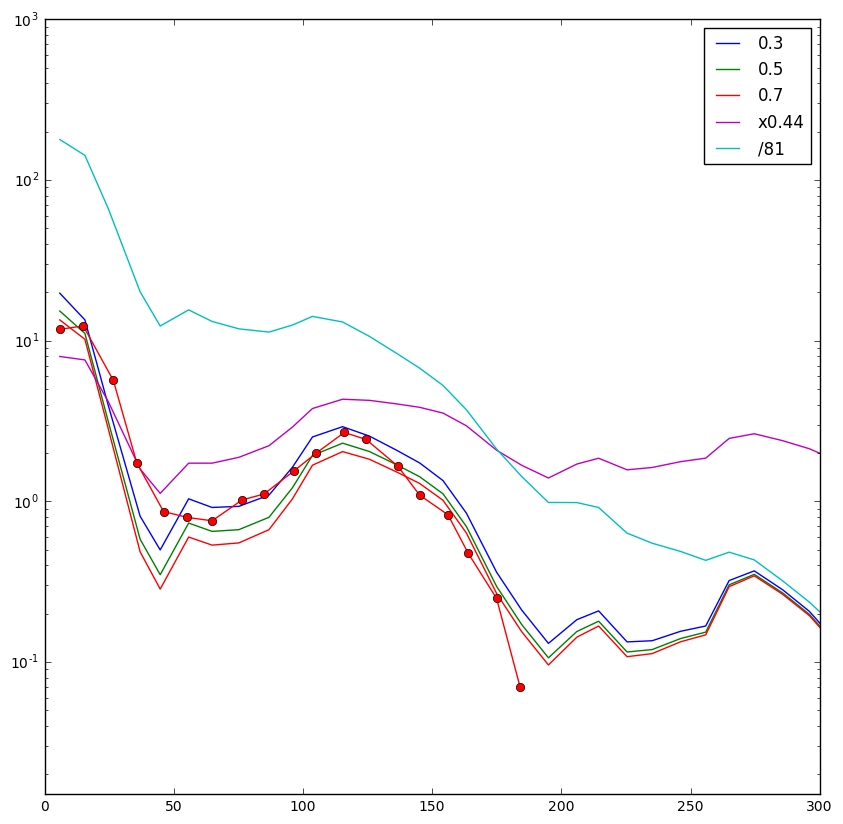

In [68]:
fig = plt.figure(figsize=[10, 10])

# plt.plot(r_g_dens, gas_dens, 's-', color='b')
plt.semilogy(r_g_dens, [h2_gas2(_[0], _[1], 0.3, 6.) for _ in  zip(r_g_dens, gas_dens)], '-', label='0.3')
plt.semilogy(r_g_dens, [h2_gas2(_[0], _[1], 0.5, 6.) for _ in  zip(r_g_dens, gas_dens)], '-', label='0.5')
plt.semilogy(r_g_dens, [h2_gas2(_[0], _[1], 0.7, 6.) for _ in  zip(r_g_dens, gas_dens)], '-', label='0.7')

plt.semilogy(r_g_dens, map(lambda l: 0.44*l, gas_dens), '-', color='m', label='x0.44')
plt.semilogy(r_mol_dens, mol_dens, 'o-', color='r')

plt.semilogy(r_g_dens, [h2_gas(_[0], _[1]) for _ in  zip(r_g_dens, gas_dens)], '-', label='/81')

plt.legend()
plt.ylim(0.015, 1000.)
plt.xlim(0, 300)
plt.show()

В целом и 1.44 и модель с давлением здесь достаточно адекватны.